<a href="https://colab.research.google.com/github/yun890503/lane_detection/blob/main/%E8%BB%8A%E9%81%93%E6%AA%A2%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 20107143029BMaILXV.jpg to 20107143029BMaILXV (1).jpg


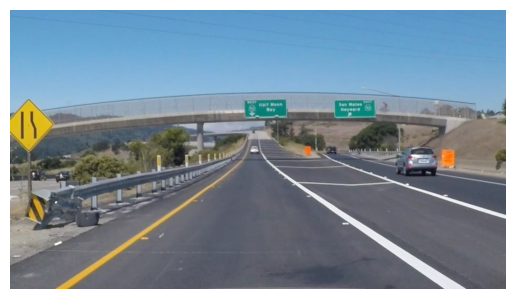

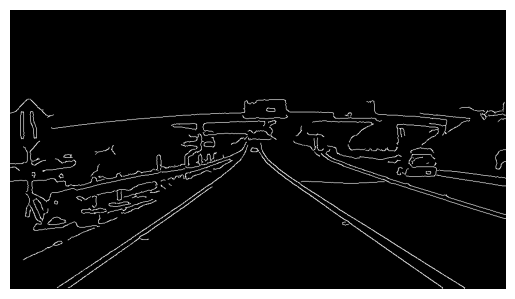

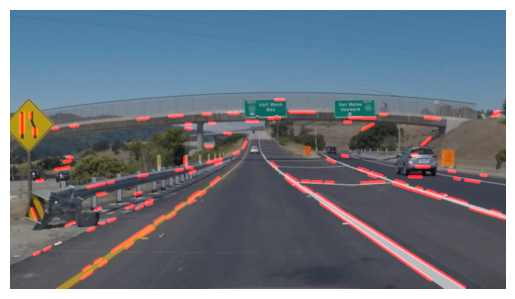

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import files

# 上传图像文件到 Colab
uploaded = files.upload()

# 读取上传的图像
file_name = list(uploaded.keys())[0]
image = cv2.imread(file_name)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # 显示原始图像
plt.axis('off')
plt.show()

# 转灰度
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 高斯平滑/模糊
kernel_size = 15
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# 调整 Canny 的参数
low_threshold = 29
high_threshold = 79
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# 显示 Canny 边缘图像
plt.imshow(edges, cmap='Greys_r')
plt.axis('off')
plt.show()

# 定义 Hough 转换参数
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1

# 创建一张空白图像，与原始图像大小相同
line_image = np.copy(image) * 0

# 运行霍夫变换在边缘图像上检测直线
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# 在原始图像上绘制检测到的直线
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 5)

# 将直线图像与原始图像叠加
final_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

# 显示结果图像
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
